# Popular Baby Names: comings and goings (1880 - 2018)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.animation as anim

In [2]:
plt.style.use('seaborn')

Loading CSV:

In [3]:
names = pd.read_csv('names_nationaldata.csv')

Previewing the table:

In [4]:
names.sample(10)

,name,sex,number,year
74185,Ahlia,F,8,2018
314009,Mia,F,300,1964
145352,Zela,F,7,1896
328909,Paulita,F,17,1960
726276,Aiko,F,12,1990
1614720,Gracie,F,103,1982
1119475,Elnora,F,7,1999
369434,Deandra,M,5,2014
601277,Rabecka,F,6,1984
775378,Kendrick,M,27,1928


Verifying the range of years:

In [5]:
print(names.year.min())
print(names.year.max())

1880
2018


# EDA

## Number of names per year, total and listed

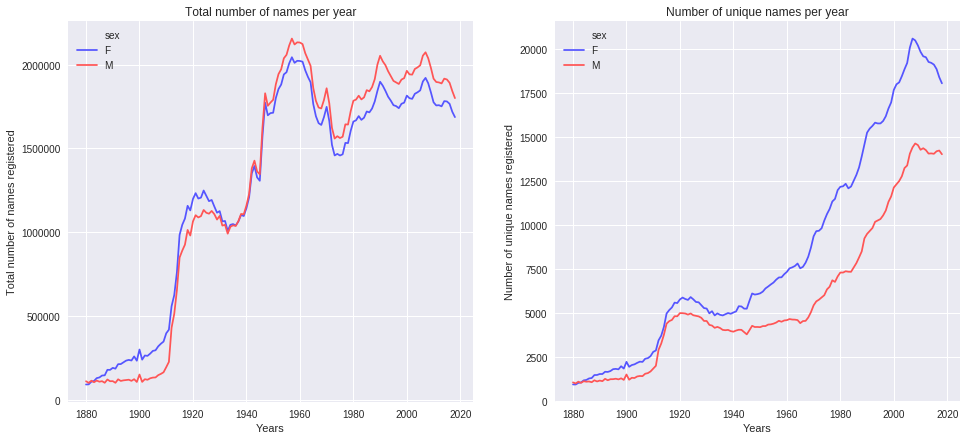

In [6]:
totalnameslistedperyear = names.groupby(['year', 'sex'])[['number']].sum().reset_index()
countnameslistedperyear = names.groupby(['year', 'sex'])[['name']].count().reset_index()

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = sns.lineplot('year', 'number', hue='sex', data=totalnameslistedperyear, ax=ax1, palette='seismic')
_ = sns.lineplot('year', 'name', hue='sex', data=countnameslistedperyear, ax=ax2, palette='seismic')
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Number of unique names registered')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Number of unique names per year')

The number of names listed each year has increased. So there must be new names coming into the list.

## Trends in names

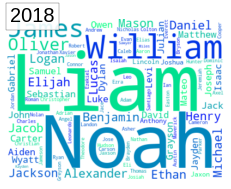

In [7]:
# Making wordclouds of top 100 names per year

colormaps = {'M':'winter', 'F':'spring'}
figwidth = 4 #inches
figheight = 3 #inches
yearsrange = range(names.year.min(), names.year.max()+1)

# creating figure to be saved
fig = plt.figure(figsize=(figwidth,figheight))
_ = plt.axis("off")

for s in ['M', 'F']:
    images = []
    for yr in yearsrange:
        # save a temporary dataframe of names and numbers per sex, per year
        tempM = names[['name', 'number']][np.logical_and(names.sex==s, \
                                           names.year==yr)].sort_values(['number', 'name'], ascending=False)
        # extract the bottom 100 names in popularity
        tempM = tempM.to_numpy()[:100]
        # create wordcloud object
        wordcloud = WordCloud(background_color="white", width=figwidth*100, height=figheight*100, colormap=colormaps[s])
        wordcloud = wordcloud.generate_from_frequencies(dict(tempM))
        plt_im = plt.imshow(wordcloud, interpolation="bilinear")
        plt_txt = plt.text(5, 5, str(yr), color='black', fontsize=20, bbox=dict(facecolor='white', alpha=0.9))
        images.append([plt_im, plt_txt])
    animation = anim.ArtistAnimation(fig, images)
    animation.save('top100{}names_{}x{}.gif'.format(s,figwidth,figheight), writer='imagemagick', fps=4)
    animation.save('top100{}names_{}x{}.mp4'.format(s,figwidth,figheight), writer='ffmpeg', fps=4)

We notice the following names going out of fashion:
* Male: William, John, James
* Female: Mary, Anna, Helen

And these names coming into fashion:
* Male: Jacob, Michael, Noah
* Female: Jennifer, Emily, Olivia

## Plotting name history

We need two dataframes with the number count per year. So I'll pivot the `names` dataframe. I will also use a dataframe with the percentage of total names each name takes up per year.

In [8]:
# Separating male and female names
namesM = names[names.sex=='M'].reset_index(drop=True)
namesF = names[names.sex=='F'].reset_index(drop=True)
# Pivot to have names in columns and years as index
namesMperYear = namesM.pivot(index='year', columns='name', values='number')
namesMperYear = namesMperYear.replace(to_replace=np.NaN, value=0)
namesFperYear = namesF.pivot(index='year', columns='name', values='number')
namesFperYear = namesFperYear.replace(to_replace=np.NaN, value=0)
# Same as previous dataframes but with a percentage of total names for each year
namesMperYearPercent = namesMperYear.divide(namesMperYear.apply(np.sum, axis=1) / 100, axis=0)
namesFperYearPercent = namesFperYear.divide(namesFperYear.apply(np.sum, axis=1) / 100, axis=0)

Previewing the table:

In [9]:
namesMperYear.tail()

name,Aaban,Aabid,Aabir,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyshonne,Zytaevius,Zytaveon,Zytavion,Zytavious,Zyus,Zyvion,Zyvon,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
2014,16.0,0.0,0.0,19.0,8.0,18.0,239.0,0.0,25.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0
2015,15.0,0.0,0.0,22.0,10.0,15.0,297.0,0.0,31.0,5.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,7.0,0.0,0.0
2016,9.0,5.0,5.0,18.0,0.0,11.0,196.0,0.0,28.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017,11.0,0.0,0.0,18.0,8.0,15.0,241.0,7.0,31.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,7.0,6.0,5.0,19.0,0.0,10.0,171.0,0.0,25.0,8.0,...,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,5.0


Example:

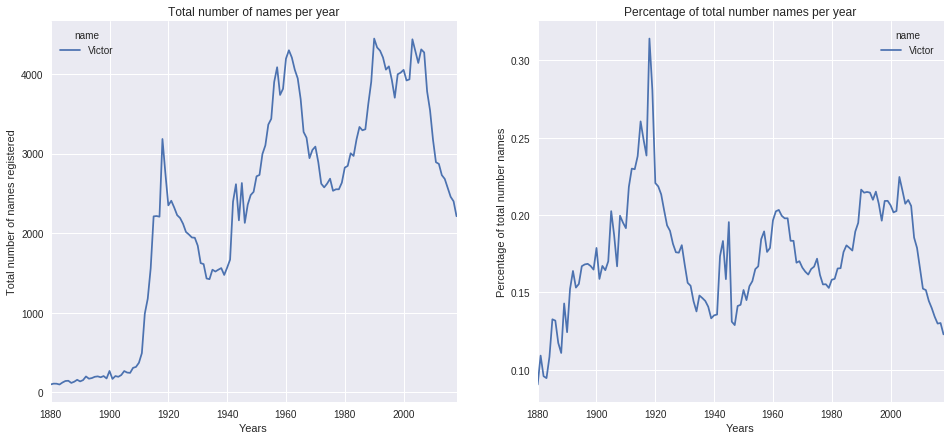

In [10]:
nameslist = ['Victor']

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[nameslist].plot(ax=ax1)
_ = namesMperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

Names going out of fashion:

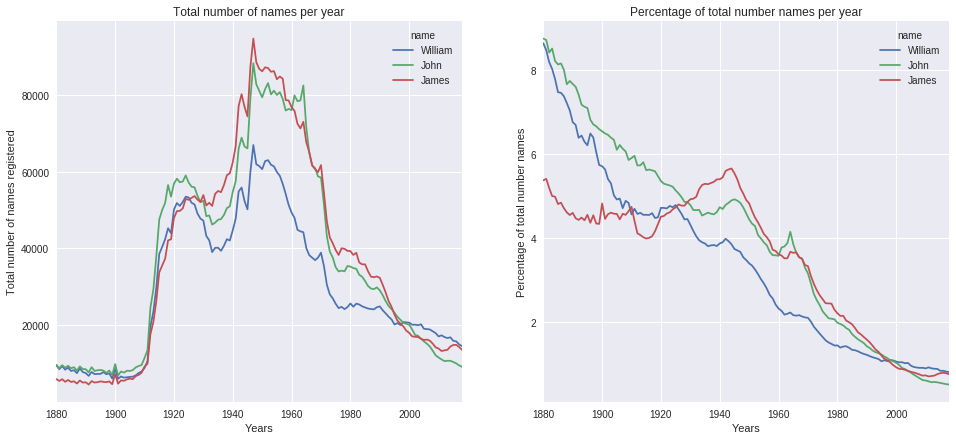

In [11]:
nameslist = ['William', 'John', 'James']

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[nameslist].plot(ax=ax1)
_ = namesMperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

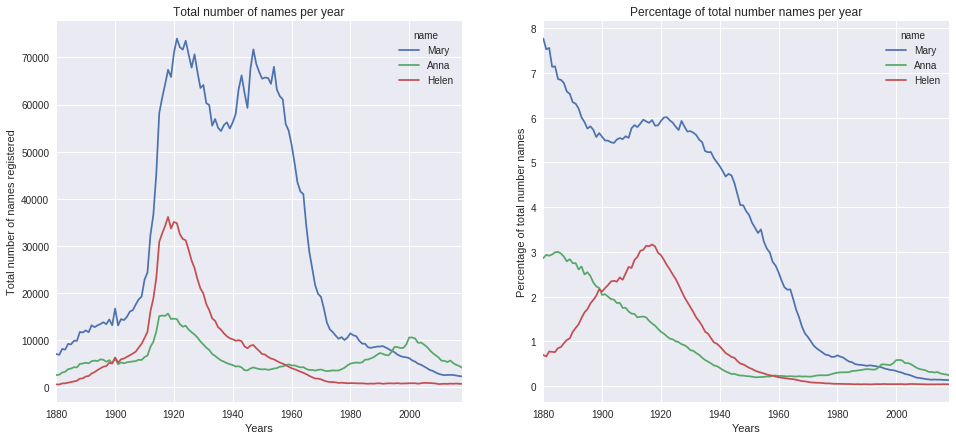

In [12]:
nameslist = ['Mary', 'Anna', 'Helen']

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesFperYear[nameslist].plot(ax=ax1)
_ = namesFperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

Names coming into fashion:

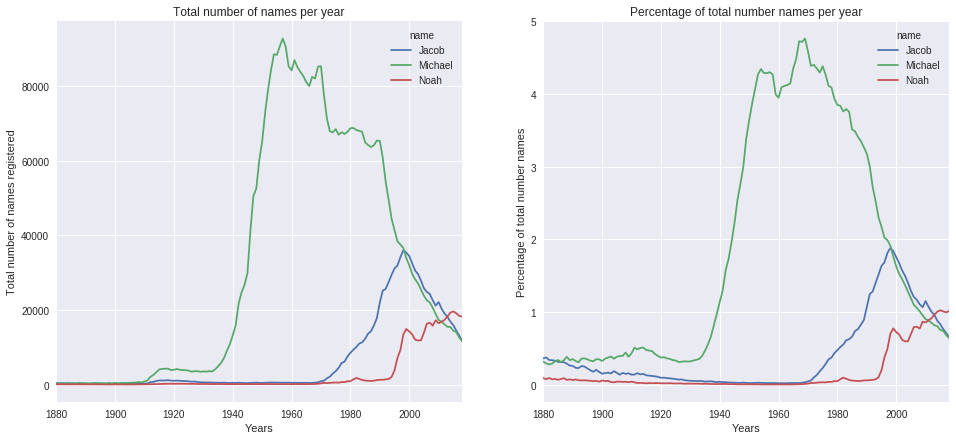

In [13]:
nameslist = ['Jacob', 'Michael', 'Noah']

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[nameslist].plot(ax=ax1)
_ = namesMperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

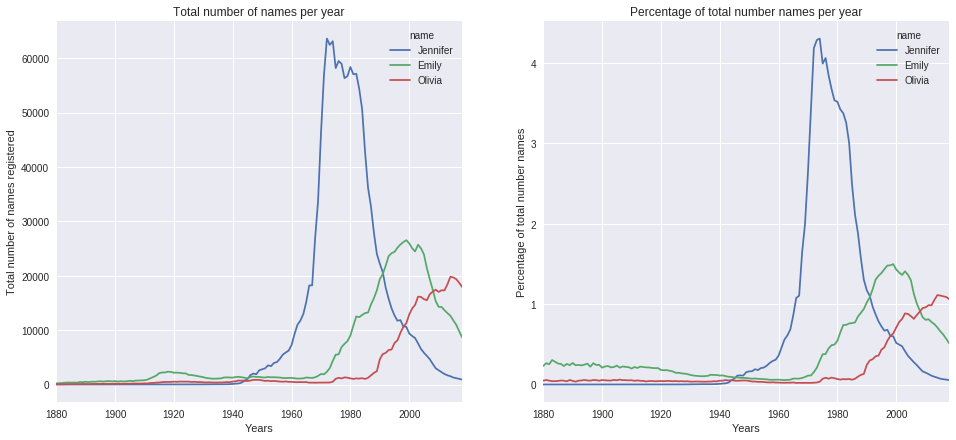

In [14]:
nameslist = ['Jennifer', 'Emily', 'Olivia']

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesFperYear[nameslist].plot(ax=ax1)
_ = namesFperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_, _ = ax1.set_title('Total number of names per year'), ax2.set_title('Percentage of total number names per year')

## Finding the top names that went and came

I'll be using a mask function to weigh the amount of names. First, names going out of fashion.

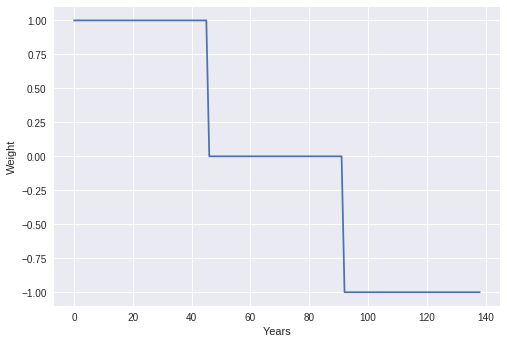

In [15]:
# Mask for disappearing names. Shape only depends on years.
mask = np.zeros(namesMperYear.shape[0]) 
mask[:namesMperYear.shape[0]//3] = 1
mask[-namesMperYear.shape[0]//3:] = -1

# Previewing the mask
_ = plt.plot(mask)
_ = plt.xlabel('Years')
_ = plt.ylabel('Weight')

In [16]:
# Making a copy of the dataframe and saving it as a numpy array
disappearing_scoreM = namesMperYearPercent.copy().to_numpy()
disappearing_scoreF = namesFperYearPercent.copy().to_numpy()
# Multiplying numpy array with mask, column by column
disappearing_scoreM *= mask.reshape(mask.shape[0],1).repeat(namesMperYear.shape[1],axis=1)
disappearing_scoreF *= mask.reshape(mask.shape[0],1).repeat(namesFperYear.shape[1],axis=1)
# Adding to find the score for each name
disappearing_scoreM = disappearing_scoreM.sum(0)
disappearing_scoreF = disappearing_scoreF.sum(0)
# Finding the top 10 scorers
namesindicesM = disappearing_scoreM.argsort()[::-1][:5]
namesindicesF = disappearing_scoreF.argsort()[::-1][:5]
# Listing the names with the top 10 disappearing scores
print(list(namesMperYear.columns[namesindicesM]))
print(list(namesFperYear.columns[namesindicesF]))

['John', 'William', 'George', 'James', 'Charles']
['Mary', 'Helen', 'Margaret', 'Anna', 'Ruth']


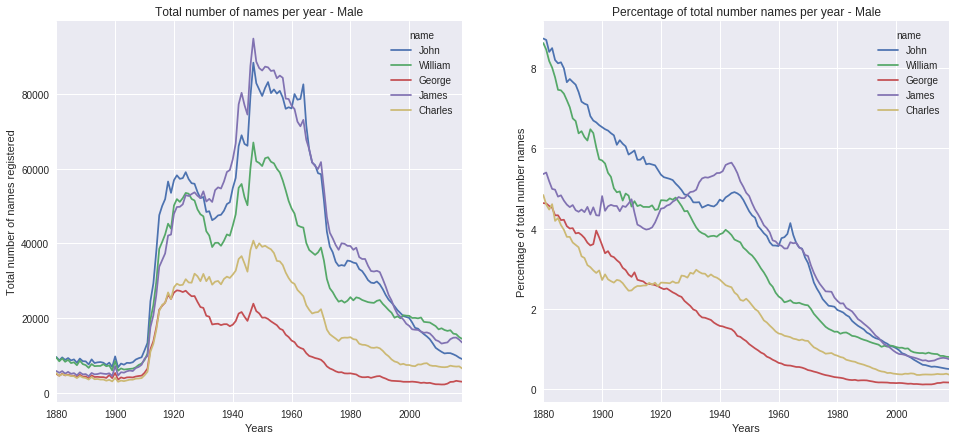

In [17]:
# Plotting the history of those names
nameslist = list(namesMperYear.columns[namesindicesM])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[nameslist].plot(ax=ax1)
_ = namesMperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_ = ax1.set_title('Total number of names per year - Male')
_ = ax2.set_title('Percentage of total number names per year - Male')

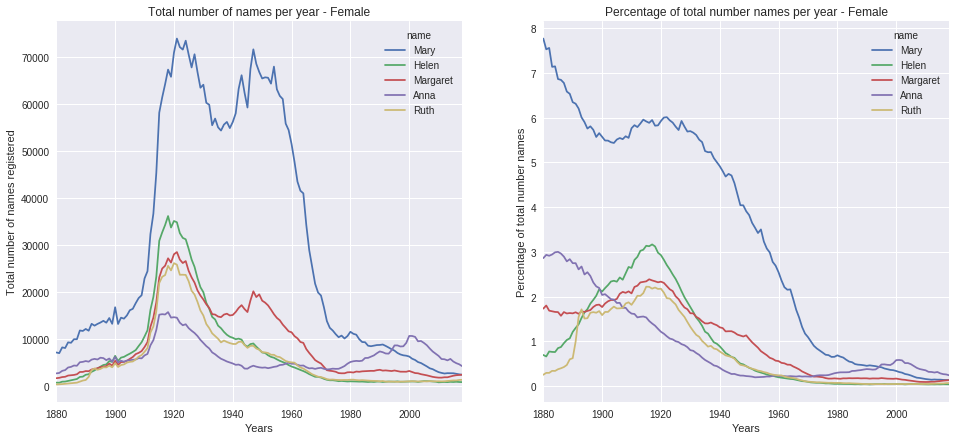

In [18]:
# Plotting the history of those names
nameslist = list(namesFperYear.columns[namesindicesF])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesFperYear[nameslist].plot(ax=ax1)
_ = namesFperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_ = ax1.set_title('Total number of names per year - Female')
_ = ax2.set_title('Percentage of total number names per year - Female')

Now, names coming into fashion

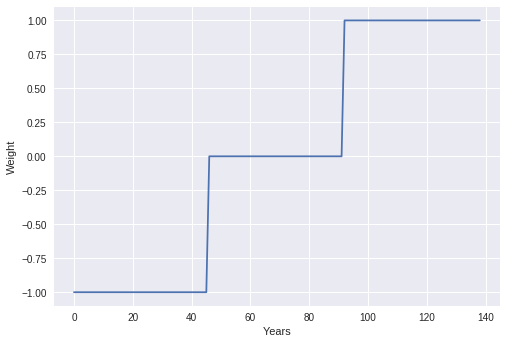

In [19]:
# Mask for new names. Shape only depends on years.
mask = np.zeros(namesMperYear.shape[0]) 
mask[:namesMperYear.shape[0]//3] = -1
mask[-namesMperYear.shape[0]//3:] = 1

# Previewing the mask
_ = plt.plot(mask)
_ = plt.xlabel('Years')
_ = plt.ylabel('Weight')

In [20]:
# Making a copy of the dataframe and saving it as a numpy array
appearing_scoreM = namesMperYearPercent.copy().to_numpy()
appearing_scoreF = namesFperYearPercent.copy().to_numpy()
# Multiplying numpy array with mask, column by column
appearing_scoreM *= mask.reshape(mask.shape[0],1).repeat(namesMperYear.shape[1],axis=1)
appearing_scoreF *= mask.reshape(mask.shape[0],1).repeat(namesFperYear.shape[1],axis=1)
# Adding to find the score for each name
appearing_scoreM = appearing_scoreM.sum(0)
appearing_scoreF = appearing_scoreF.sum(0)
# Finding the top 10 scorers
namesindicesM = appearing_scoreM.argsort()[::-1][:5]
namesindicesF = appearing_scoreF.argsort()[::-1][:5]
# Listing the names with the top 10 appearing scores
print(list(namesMperYear.columns[namesindicesM]))
print(list(namesFperYear.columns[namesindicesF]))

['Michael', 'Christopher', 'Matthew', 'Joshua', 'Jason']
['Jennifer', 'Jessica', 'Ashley', 'Amanda', 'Melissa']


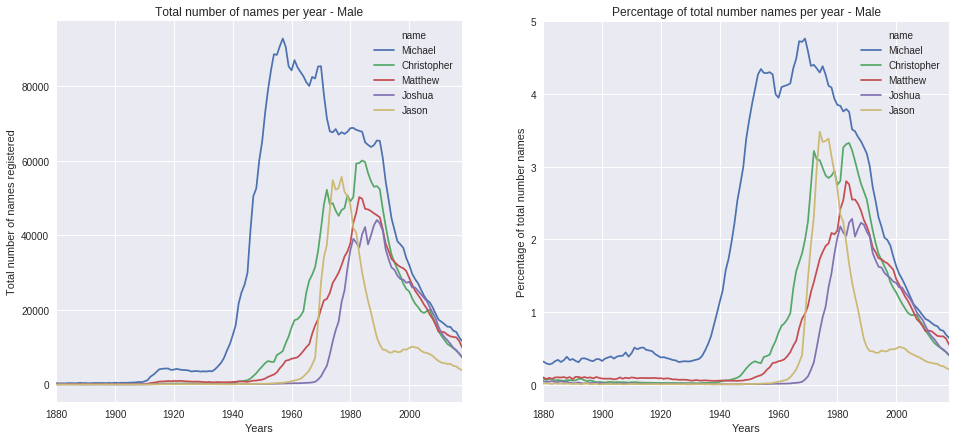

In [21]:
# Plotting the history of those names
nameslist = list(namesMperYear.columns[namesindicesM])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesMperYear[nameslist].plot(ax=ax1)
_ = namesMperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_ = ax1.set_title('Total number of names per year - Male'), 
_ = ax2.set_title('Percentage of total number names per year - Male')


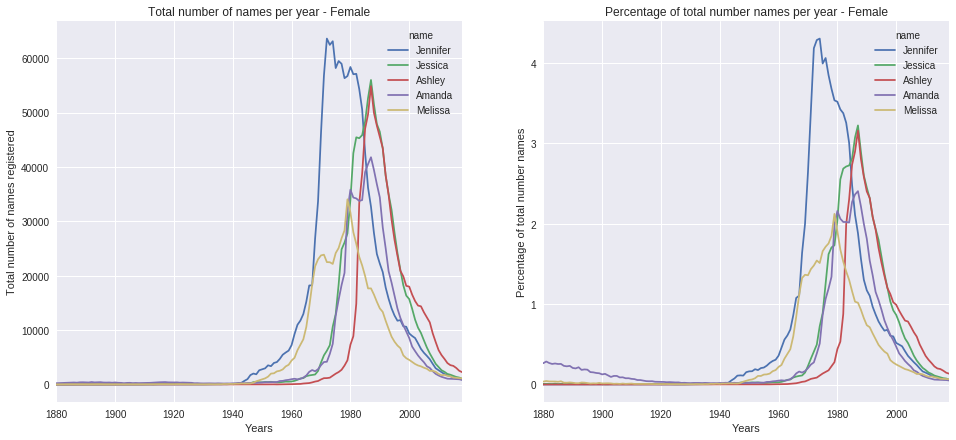

In [22]:
# Plotting the history of those names
nameslist = list(namesFperYear.columns[namesindicesF])

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(16), fig.set_figheight(7)
_ = namesFperYear[nameslist].plot(ax=ax1)
_ = namesFperYearPercent[nameslist].plot(ax=ax2)
_, _ = ax1.set_xlabel('Years'), ax2.set_xlabel('Years')
_, _ = ax1.set_ylabel('Total number of names registered'), ax2.set_ylabel('Percentage of total number names')
_ = ax1.set_title('Total number of names per year - Female')
_ = ax2.set_title('Percentage of total number names per year - Female')